# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Regression Model Evaluation

In [2]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [10]:
from sklearn.model_selection import train_test_split
predictor_data = data.drop('MEDV', axis=1)
response_data = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(predictor_data, response_data, train_size= 0.8, test_size=0.2, random_state=42)

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [13]:
from sklearn.linear_model import LinearRegression
data_model = LinearRegression()
data_model.fit(X_train, y_train)
y_train_predict = data_model.predict(X_train)

data_model_test = LinearRegression()
data_model_test.fit(X_test, y_test)
y_test_predict = data_model_test.predict(X_test)
 

## 3. Calculate and print R-squared for both the training and the testing set.

In [ ]:

rsquared_train = data_model.score(X_train, y_train)
print(f"training r squared score is: {rsquared_train}")
rsquared_test = data_model.score(X_test, y_test)
print(f"test r squared score is: {rsquared_test}")


training r squared score is: 0.7508856358979673
test r squared score is: 0.6687594935356329


## 4. Calculate and print mean squared error for both the training and the testing set.

In [16]:
from sklearn.metrics import mean_squared_error
print("Mean squared error for training set: %.2f" %  mean_squared_error(y_train, y_train_predict))
print("Mean squared error for test set: %.2f" % mean_squared_error(y_test, y_test_predict))

Mean squared error for training set: 21.64
Mean squared error for test set: 17.19


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [17]:
import numpy as np
print("Mean absolute error for training set: %.2f" % np.mean(np.absolute(y_train_predict - y_train)))
print("Mean absolute error for test set: %.2f" % np.mean(np.absolute(y_test_predict - y_test)))

Mean absolute error for training set: 3.31
Mean absolute error for test set: 2.92


## Classification Model Evaluation

In [18]:
from sklearn.datasets import load_iris
data = load_iris()

In [19]:
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [27]:
column_names = data.feature_names

In [21]:
df = pd.DataFrame(data['data'],columns=column_names)

In [22]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [23]:
target = pd.DataFrame(data.target)

In [24]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [32]:
data['target_names']
target.shape

(150, 1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [33]:
from sklearn.model_selection import train_test_split
X_train_flower, X_test_flower, y_train_flower, y_test_flower = train_test_split(df, target, train_size= 0.8, test_size=0.2, random_state=42)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [34]:
from sklearn.linear_model import LogisticRegression
data_model_flower = LogisticRegression()
data_model_flower.fit(X_train_flower, y_train_flower)
y_train_predict_flower = data_model_flower.predict(X_train_flower)

data_model_test_flower = LogisticRegression()
data_model_test_flower.fit(X_test_flower, y_test_flower)
y_test_predict_flower = data_model_test_flower.predict(X_test_flower)

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [45]:
from sklearn.metrics import accuracy_score 
data_model_flower_ascore = accuracy_score(y_train_flower, y_train_predict_flower)
print(f" Accuracy score for training set is: {data_model_flower_ascore}")
data_model_test_flower_ascore = accuracy_score(y_test_flower, y_test_predict_flower)
print(f" Accuracy score for test set is: {data_model_test_flower_ascore}")

 Accuracy score for training set is: 0.975
 Accuracy score for test set is: 1.0


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [42]:
from sklearn.metrics import balanced_accuracy_score 
data_model_flower_bscore = balanced_accuracy_score(y_train_flower, y_train_predict_flower)
print(f" Balanced Accuracy score for training set is: {data_model_flower_bscore}")
data_model_test_flower_bscore = balanced_accuracy_score(y_test_flower, y_test_predict_flower)
print(f" Balanced Accuracy score for test set is: {data_model_test_flower_bscore}")


 Balanced Accuracy score for training set is: 0.975609756097561
 Balanced Accuracy score for test set is: 1.0


## 10. Calculate and print the precision score for both the training and the testing set.

In [48]:
from sklearn.metrics import precision_score 
data_model_flower_pscore = precision_score(y_train_flower, y_train_predict_flower, average= 'macro')
print(f" Precision score for training set is: {data_model_flower_pscore}")
data_model_test_flower_pscore = precision_score(y_test_flower, y_test_predict_flower, average='macro')
print(f" Precision score for test set is: {data_model_test_flower_pscore}")

 Precision score for training set is: 0.9761904761904763
 Precision score for test set is: 1.0


## 11. Calculate and print the recall score for both the training and the testing set.

In [49]:
from sklearn.metrics import recall_score 
data_model_flower_recallscore = recall_score(y_train_flower, y_train_predict_flower, average= 'macro')
print(f" Recall score for training set is: {data_model_flower_recallscore}")
data_model_test_flower_recallscore = recall_score(y_test_flower, y_test_predict_flower, average='macro')
print(f" Recall score for test set is: {data_model_test_flower_recallscore}")

 Recall score for training set is: 0.975609756097561
 Recall score for test set is: 1.0


## 12. Calculate and print the F1 score for both the training and the testing set.

In [50]:
from sklearn.metrics import f1_score 
data_model_flower_F1score = f1_score(y_train_flower, y_train_predict_flower, average= 'macro')
print(f" F1 score for training set is: {data_model_flower_F1score}")
data_model_test_flower_F1score = f1_score(y_test_flower, y_test_predict_flower, average='macro')
print(f" F1 score for test set is: {data_model_test_flower_F1score}")

 F1 score for training set is: 0.974996093139553
 F1 score for test set is: 1.0


## 13. Generate confusion matrices for both the training and the testing set.

TRAINING SET


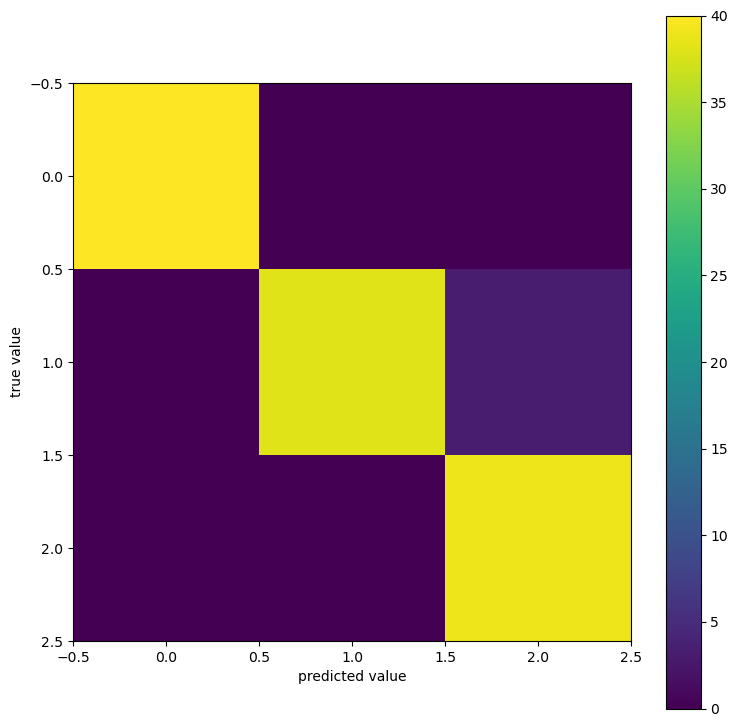

In [52]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_pred, y):
    plt.imshow(metrics.confusion_matrix(y, y_pred), interpolation='nearest')
    plt.colorbar()
    plt.ylabel('true value')
    plt.xlabel('predicted value')
    fig = plt.gcf()
    fig.set_size_inches(9,9)    
    
print("TRAINING SET")
plot_confusion_matrix(y_train_predict_flower,y_train_flower)




TESTING SET


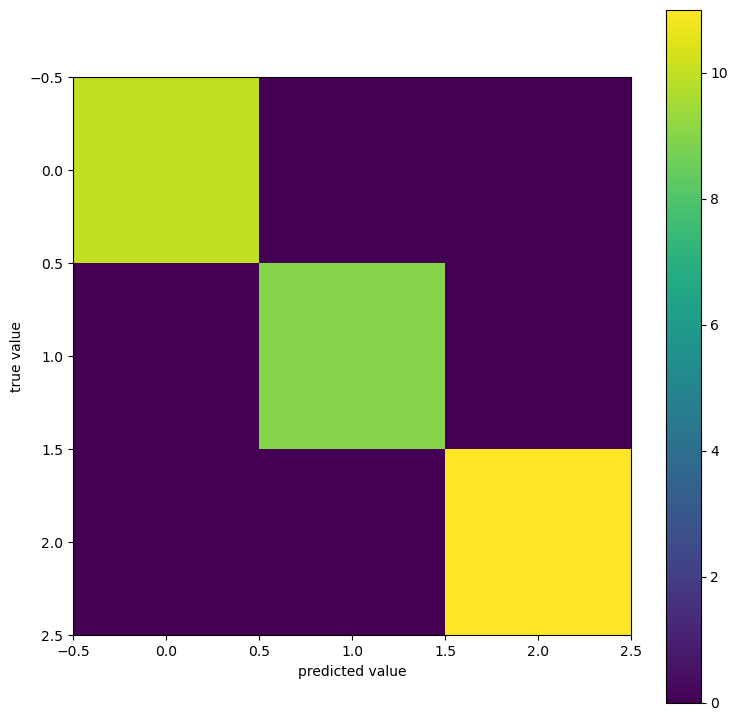

In [53]:
print("TESTING SET")
plot_confusion_matrix(y_test_predict_flower,y_test_flower)

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [26]:
# Have fun here !